In [1]:
import pandas as pd
data = {
    "ID": [0,1,2,3,4,5,6,7,8,9],
    "A" : [59, 24, 62, 48, 58, 19, 32, 88, 47, 63],
    "B" : [49, 50, 49, 54, 45, 52, 56, 48, 45, 52]
}
df = pd.DataFrame(data)
print(df["A"].mean())
print(df["B"].mean())

50.0
50.0


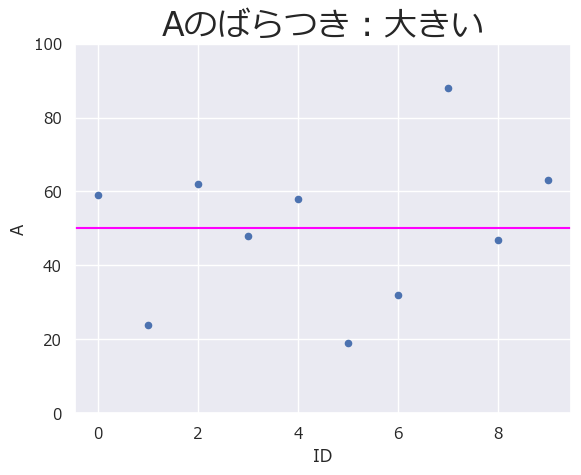

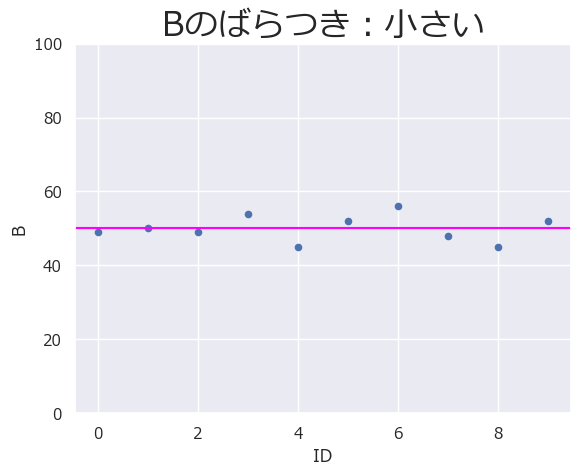

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=["Meiryo"])

df.plot.scatter(x="ID", y="A", color="b", ylim=(0,100))
plt.axhline(y=50, c="Magenta")
plt.title("Aのばらつき：大きい", fontsize=24)
plt.show()

df.plot.scatter(x="ID", y="B", color="b", ylim=(0,100))
plt.axhline(y=50, c="Magenta")
plt.title("Bのばらつき：小さい", fontsize=24)
plt.show()

In [4]:
print(df.var())

ID      9.166667
A     430.666667
B      12.888889
dtype: float64


In [5]:
print(df.std())

ID     3.02765
A     20.75251
B      3.59011
dtype: float64


In [6]:
meanA = df["A"].mean()
stdA = df["A"].std()
print(meanA - stdA, "〜", meanA + stdA)

29.247490111635493 〜 70.7525098883645


In [7]:
meanB = df["B"].mean()
stdB = df["B"].std()
print(meanB - stdB, "〜", meanB + stdB)

46.409890128577 〜 53.590109871423


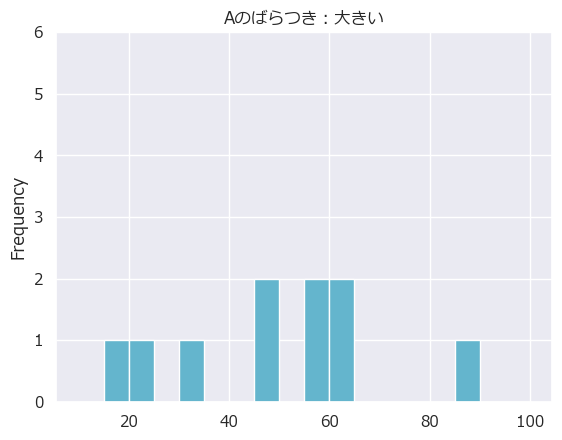

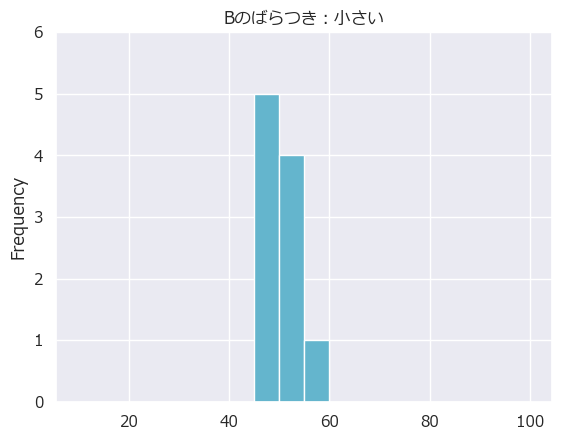

In [8]:
bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

df["A"].plot.hist(bins=bins, color="c",ylim=(0,6))
plt.title("Aのばらつき：大きい")
plt.show()

df["B"].plot.hist(bins=bins, color="c",ylim=(0,6))
plt.title("Bのばらつき：小さい")
plt.show()

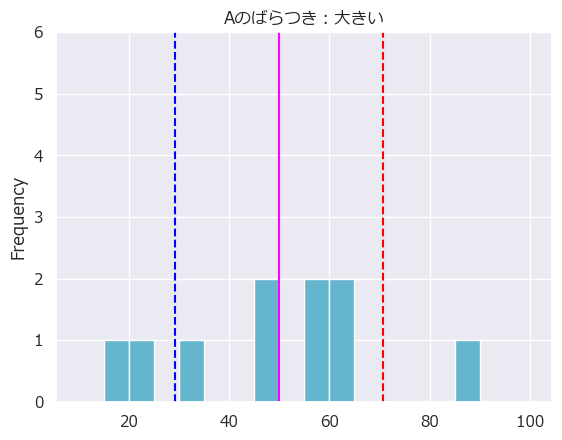

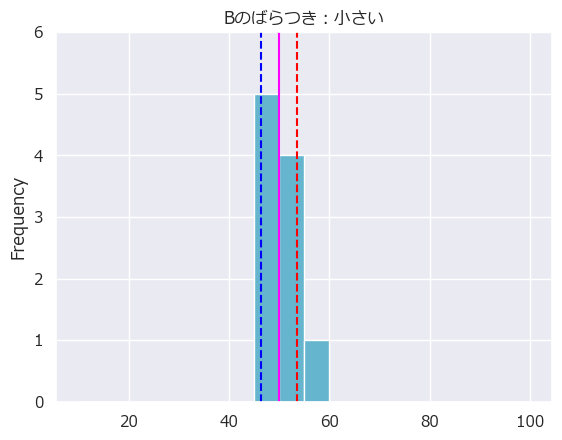

In [9]:
df["A"].plot.hist(bins=bins, color="c",ylim=(0,6)) # 6はy軸の最大値
plt.axvline(x=meanA, color="magenta") # 平均値
plt.axvline(x=meanA - stdA, color="blue", linestyle="--") # 標準偏差
plt.axvline(x=meanA + stdA, color="red", linestyle="--") # 標準偏差
plt.title("Aのばらつき：大きい")
plt.show()

df["B"].plot.hist(bins=bins, color="c",ylim=(0,6))
plt.axvline(x=meanB, color="magenta")
plt.axvline(x=meanB - stdB, color="blue", linestyle="--")
plt.axvline(x=meanB + stdB, color="red", linestyle="--")
plt.title("Bのばらつき：小さい")
plt.show()